In [8]:
import sys
import functools
from collections import namedtuple
import numpy as np
from uncertainties import ufloat, unumpy
import uncertainties
import scipy
import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

sys.path.append("..")

%load_ext autoreload
%autoreload 1
from ntupleReaders.clue_ntuple_reader import ClueNtupleReader
from hists.parameters import beamEnergies, synchrotronBeamEnergiesMap
%aimport energy_resolution.sigma_over_e
from energy_resolution.sigma_over_e import SigmaOverEComputations, fitSigmaOverE, SigmaOverEPlotElement, plotSigmaOverMean, sigmaOverE_fitFunction, plotSCAsEllipse, EResolutionFitResult, SigmaMuResult, plotEllipse, plotFittedMean, plotFittedSigma
from energy_resolution.hist_loader import HistLoader
#from fit import HistogramEstimates

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
levels = ["rechits", "clue", "clue3d"]
levelLabelMap = {"rechits":"Rechits", "clue":"CLUE", "clue3d":"CLUE3D", "paper" : "JINST paper"}
levelColorMap = {"rechits":"tab:blue", "clue":"tab:orange", "clue3d":"tab:green"}

In [3]:
reader_data = ClueNtupleReader("v41", "cmssw", "data") 
reader_sim = ClueNtupleReader("v41", "cmssw", "sim_proton_v46_patchMIP") 
# comp_data = SigmaOverEComputations(sigmaWindow=(1, 2.5))
# res_data = {level : comp_data.compute({beamEnergy : HistLoader(reader_data.histStore).getProjected(reader_data.datatype, beamEnergy, level) for beamEnergy in beamEnergies}, multiprocess=True)
#             for level in levels}
comp_sim = SigmaOverEComputations(sigmaWindow=(1, 2.5))
res_sim = {level : comp_sim.compute({beamEnergy : HistLoader(reader_sim.histStore).getProjected(reader_sim.datatype, beamEnergy, level) for beamEnergy in beamEnergies}, multiprocess=True)
            for level in levels}

2023-06-26 16:50:09.482277: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:1278] could not retrieve CUDA device count: CUDA_ERROR_NOT_INITIALIZED: initialization error
2023-06-26 16:50:09.486240: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:1278] could not retrieve CUDA device count: CUDA_ERROR_NOT_INITIALIZED: initialization error
2023-06-26 16:50:09.486698: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:1278] could not retrieve CUDA device count: CUDA_ERROR_NOT_INITIALIZED: initialization error
2023-06-26 16:50:09.488150: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:1278] could not retrieve CUDA device count: CUDA_ERROR_NOT_INITIALIZED: initialization error
2023-06-26 16:50:09.489276: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:1278] could not retrieve CUDA device count: CUDA_ERROR_NOT_INITIALIZED: initialization error
2023-06-26 16:50:09.489352: E tensorflow/compiler/xla/stream_executor/cuda/cuda_drive

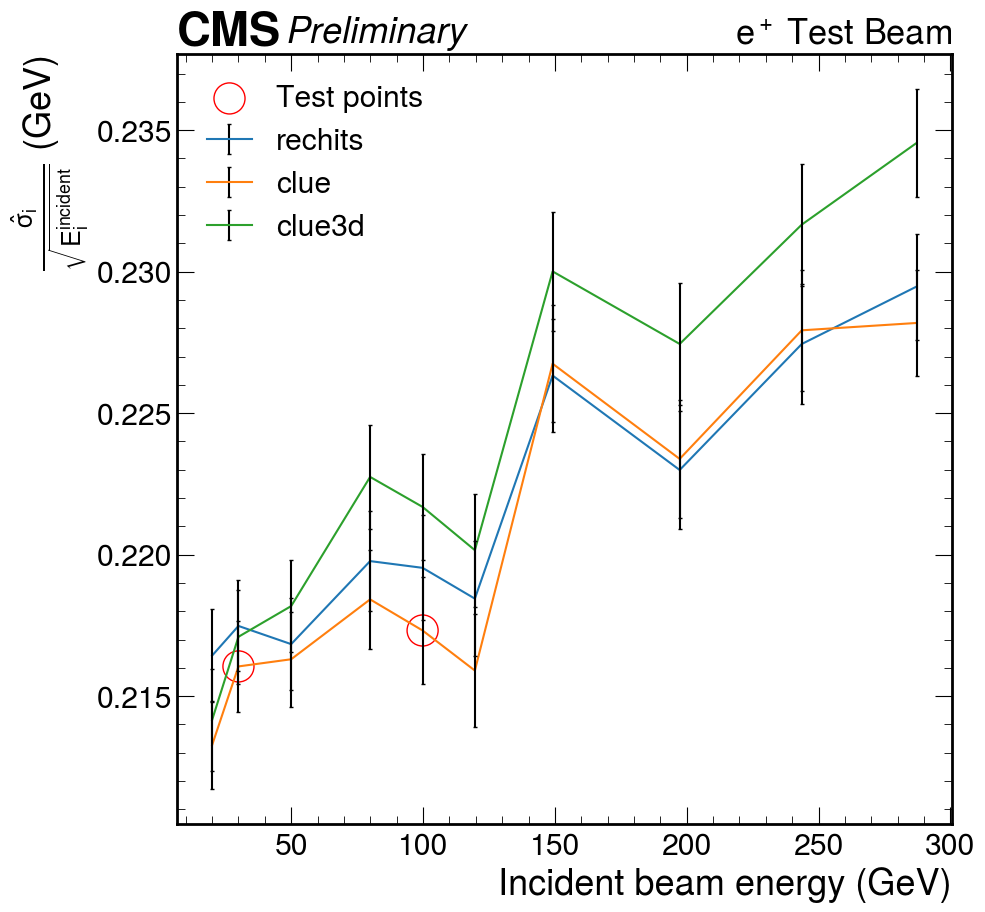

In [21]:
plotFittedSigma(res_sim, errors=True, beamEnergiesToCircle={"clue":[30, 100]}, normBy="sqrt(E)")